In [176]:
import pyforest

In [177]:
power=pd.read_csv("powerplant_train.csv")
power

<IPython.core.display.Javascript object>

,AT,V,AP,RH,PE
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723
...,...,...,...,...,...
9563,4.44,38.44,1016.14,75.35,499.615488
9564,18.18,67.71,1004.50,87.26,461.130122
9565,10.96,45.01,1017.97,95.82,481.245635
9566,8.70,36.24,1013.34,89.50,490.928341


### Rename cloumns for convinience

In [178]:
power.rename(columns={'AT':'Ambient_temperature','V':'Exhaust_Vaccum','AP':'Ambient_pressure','RH':'Relative_humidity','PE':'Energy_output'},inplace=True)

In [179]:
power

,Ambient_temperature,Exhaust_Vaccum,Ambient_pressure,Relative_humidity,Energy_output
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723
...,...,...,...,...,...
9563,4.44,38.44,1016.14,75.35,499.615488
9564,18.18,67.71,1004.50,87.26,461.130122
9565,10.96,45.01,1017.97,95.82,481.245635
9566,8.70,36.24,1013.34,89.50,490.928341


## Exploratory data analysis

In [180]:
power.isna().mean()*100

Ambient_temperature    0.0
Exhaust_Vaccum         0.0
Ambient_pressure       0.0
Relative_humidity      0.0
Energy_output          0.0
dtype: float64

In [181]:
import dtale #Auto EDA library
dtale.show(power)

In [182]:
power.corr()

,Ambient_temperature,Exhaust_Vaccum,Ambient_pressure,Relative_humidity,Energy_output
Ambient_temperature,1.000000,0.842054,-0.514305,-0.541602,-0.946352
Exhaust_Vaccum,0.842054,1.000000,-0.415093,-0.306395,-0.867356
Ambient_pressure,-0.514305,-0.415093,1.000000,0.115454,0.520058
Relative_humidity,-0.541602,-0.306395,0.115454,1.000000,0.387785
Energy_output,-0.946352,-0.867356,0.520058,0.387785,1.000000


In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #Check VIF 

def calc_vif(X):
    
    #calculating vif
    vif=pd.DataFrame()
    vif['variables']=X.columns
    vif['vif']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
    return(vif)

In [184]:
X=power.iloc[:,:-1]
calc_vif(X)

<IPython.core.display.Javascript object>

,variables,vif
0,Ambient_temperature,39.628674
1,Exhaust_Vaccum,75.141413
2,Ambient_pressure,66.505884
3,Relative_humidity,40.633299


In [185]:
power.kurtosis()

Ambient_temperature   -1.038187
Exhaust_Vaccum        -1.459973
Ambient_pressure       0.022437
Relative_humidity     -0.493871
Energy_output         -1.033160
dtype: float64

In [186]:
power.skew()

Ambient_temperature   -0.149024
Exhaust_Vaccum         0.177096
Ambient_pressure       0.240197
Relative_humidity     -0.423511
Energy_output          0.322296
dtype: float64

## Feature Engineering

In [187]:
power.drop(['Exhaust_Vaccum'],inplace=True,axis=1) #Drop this & consider of the columns as it is having high correlation with Ambient Temperature variables

In [188]:
power

,Ambient_temperature,Ambient_pressure,Relative_humidity,Energy_output
0,29.07,1009.24,58.38,449.371855
1,32.38,1006.97,60.04,450.861043
2,19.29,1007.94,63.71,460.894029
3,16.45,1016.64,45.21,467.577314
4,21.43,1013.94,61.25,469.805723
...,...,...,...,...
9563,4.44,1016.14,75.35,499.615488
9564,18.18,1004.50,87.26,461.130122
9565,10.96,1017.97,95.82,481.245635
9566,8.70,1013.34,89.50,490.928341


In [189]:
power.corr() #check correlation after dropping Exhaust_vaccum variable

,Ambient_temperature,Ambient_pressure,Relative_humidity,Energy_output
Ambient_temperature,1.000000,-0.514305,-0.541602,-0.946352
Ambient_pressure,-0.514305,1.000000,0.115454,0.520058
Relative_humidity,-0.541602,0.115454,1.000000,0.387785
Energy_output,-0.946352,0.520058,0.387785,1.000000


In [190]:
power.skew() #Final check of skewness

Ambient_temperature   -0.149024
Ambient_pressure       0.240197
Relative_humidity     -0.423511
Energy_output          0.322296
dtype: float64

## Univariate and Bivariate visualizations

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

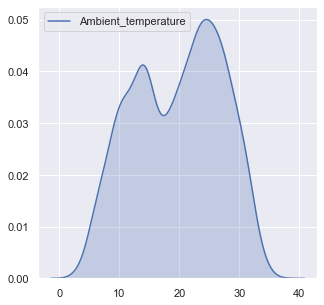

In [191]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(power['Ambient_temperature'],shade=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

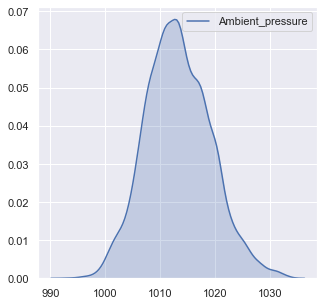

In [192]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(power['Ambient_pressure'],shade=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

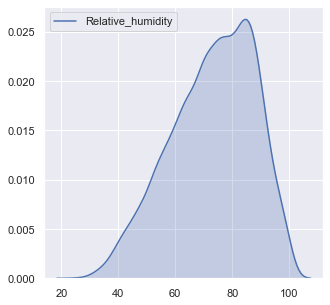

In [193]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(power['Relative_humidity'],shade=True)

## Model building

In [194]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
array=power.values
X=array[:,0:3]
Y=array[:,3]
num_folds=10
seed=7
kfold=KFold(n_splits=num_folds,random_state=seed)
model=LinearRegression()
results=cross_val_score(model,X,Y,cv=kfold)


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [195]:
results.mean()*100

91.74616151539038

In [196]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
array1=power.values
X1=array1[:,0:3]
Y1=array1[:,3]
num_folds=10
seed=7
kfold=KFold(n_splits=num_folds,random_state=seed)
model1=Lasso()
results1=cross_val_score(model1,X1,Y1,cv=kfold)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [197]:
results1.mean()*100

91.72832058985833

In [198]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
array2=power.values
X2=array2[:,0:3]
Y2=array2[:,3]
num_folds=10
seed=7
kfold=KFold(n_splits=num_folds,random_state=seed)
model2=Ridge()
results2=cross_val_score(model2,X2,Y2,cv=kfold)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [199]:
results2.mean()*100

91.74616157022776

In [200]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
array3=power.values
X3=array3[:,0:3]
Y3=array3[:,3]
num_folds=10
kfold=KFold(n_splits=num_folds)
model3=DecisionTreeRegressor()
results3=cross_val_score(model3,X3,Y3,cv=kfold)

In [201]:
results3.mean()*100

93.5041862483683

In [202]:
from sklearn.ensemble import RandomForestRegressor 
array4=power.values
X4=array4[:,0:3]
Y4=array4[:,3]
num_folds=10
kfold=KFold(n_splits=num_folds)
model4=RandomForestRegressor()
results4=cross_val_score(model4,X4,Y4,cv=kfold)

In [203]:
results4.mean()*100 

95.95918453605107

In [204]:
import pickle

In [205]:
with open ("random_pickle",'wb')as f:
    pickle.dump(model4,f)